## This notebook creates scatter plots for the AMOC and sea ice, using predefined data frames

In [1]:
#No change needs here

'''Define PMIP model list'''
# This cell lists CMIP/PMIP model groups

pmip_v4='PMIP4'
pmip_v3='PMIP3'
pmip={}
pmip['PMIP4']=['AWI-ESM-1-1-LR',
               'CESM2',
               'EC-EARTH-3-3',
               'FGOALS-f3-L',
               'FGOALS-g3',
               'GISS-E2-1-G',
               'HadGEM3-GC31',
               'IPSL-CM6A-LR',
               'MIROC-ES2L',
               'MPI-ESM1-2-LR',
               'MRI-ESM2-0',
               'NESM3',
               'NorESM1-F',
               'NorESM2',
               'UofT-CCSM-4']
pmip['PMIP3']=['BCC-CSM1-1',
               'CCSM4',
               'CNRM-CM5',
               'CSIRO-Mk3L-1-2',
               'CSIRO-Mk3-6-0',
               'EC-EARTH-2-2',
               'FGOALS-g2',
               'FGOALS-s2',
               'GISS-E2-R',
               'HadGEM2-CC',
               'HadGEM2-ES',
               'IPSL-CM5A-LR',
               'KCM1-2-2',
               'MIROC-ESM',
               'MPI-ESM-P',
               'MRI-CGCM3']
               
               
         

In [2]:
#import packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import os
import matplotlib.colors as colors
import scipy
import matplotlib.collections as collections
%matplotlib inline

In [3]:
#load AMOC data
df= pd.read_csv('amoc.csv',skipinitialspace=True,header=0)
df

,location,piControl_30N,midHolocene_30N,piControl_50N,midHolocene_50N,r,g,b
0,AWI-ESM-1-1-LR,13.760822,14.173894,9.496703,9.587777,0.933333,0.462745,0.000000
1,CCSM4,20.772700,20.532100,16.669800,16.200000,0.000000,0.000000,1.000000
2,CESM2,19.062000,19.625500,16.560000,16.867500,0.000000,0.807843,0.819608
3,EC-Earth3-LR,15.441300,16.859100,14.301500,15.081200,0.933333,0.070588,0.537255
4,FGOALS-f3-L,24.004900,24.541300,20.807200,21.312100,0.000000,0.000000,0.545098
5,FGOALS-g2,23.354300,23.002100,17.837900,17.556200,0.690196,0.878431,0.901961
6,GISS-E2-1-G,24.760500,24.888300,15.362000,15.223500,0.545098,0.000000,0.545098
7,HadGEM3-GC31,16.630700,18.141300,13.689800,14.498400,0.000000,0.545098,0.000000
8,INM-CM4-8,18.836000,18.117700,6.008110,5.746590,0.698039,0.133333,0.133333
9,IPSL-CM6A-LR,11.881200,11.180900,11.029200,10.426200,0.545098,0.270588,0.074510


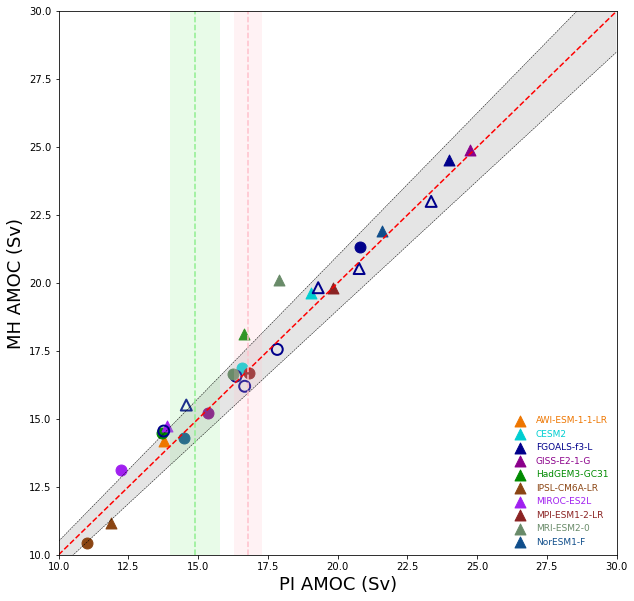

In [4]:
models=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['location']
pi30=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['piControl_30N']
pi50=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['piControl_50N']
mh30=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['midHolocene_30N']
mh50=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['midHolocene_50N']
r=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['r']
g=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['g']
b=pd.read_csv('amoc.csv',skipinitialspace=True,header=0)['b']
#Plotting
plt.figure(figsize=(10,10))
plt.xlim(10,30)
plt.ylim(10,30)
#Create reference line and shading
x1=np.arange(10,31)
y1=x1
y2=0.95*x1
y3=1.05*x1
plt.plot(x1,y1,"r--")
plt.plot(x1,y2,"k--",lw=0.5)
plt.plot(x1,y3,"k--",lw=0.5)
plt.fill_between(x1, y2, y3,facecolor='k', alpha=0.1)


#Set point colors 

#plotting    
for i in range(len(models)):
    if models[i] in pmip['PMIP4']:
        plt.scatter(pi30[i],mh30[i],s=120,color=(r[i],g[i],b[i]),marker='^',label=models[i])
        plt.scatter(pi50[i],mh50[i],s=120,color=(r[i],g[i],b[i]),marker='o')
    if models[i] in pmip['PMIP3']:
        plt.scatter(pi30[i],mh30[i],s=120,color='darkblue',linewidths=2,facecolors='none',marker='^')
        plt.scatter(pi50[i],mh50[i],s=120,color='darkblue',linewidths=2,facecolors='none',marker='o')
#legend
leg=plt.legend(loc='lower right',edgecolor='None',facecolor='None',fontsize=9)
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])
#axis labels
plt.xlabel('PI AMOC (Sv)',fontsize=18)
plt.ylabel('MH AMOC (Sv)',fontsize=18)
Y1=[10,10]
Y2=[30,30]
X1=[14,15.8]#OSNAP:14.9+/-0.9 Sv
#X2=[16.9,17.5]#longterm RAPID:17.2+/-0.3
X2=[16.3,17.3]#overlap OSNAP 16.8+/-0.5
plt.axvline(x=16.8,color='pink',linestyle="--",linewidth=1.5,label='RAPID')
plt.fill_between(X2,Y1, Y2,facecolor='pink', alpha=0.2)
plt.axvline(x=14.9,color='lightgreen',linestyle="--",linewidth=1.5,label='O-SNAP')
plt.fill_between(X1, Y1, Y2,facecolor='lightgreen', alpha=0.2)


#save plot
plt.savefig('../plots/pdf/AMOC_overlapRAPID.pdf')

### Move onto sea ice figures

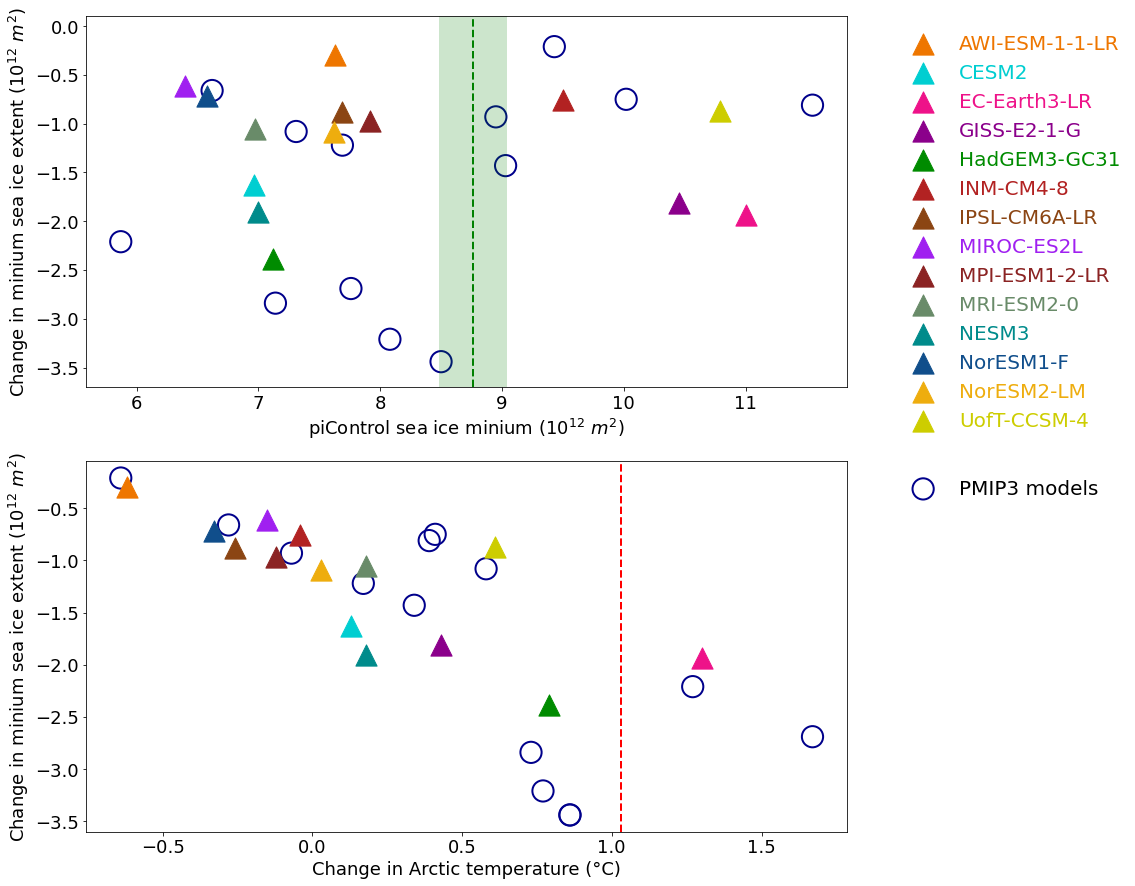

In [6]:
model3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['model']
pi3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['pi_sic_min']
d3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['diff_sic']
dt3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['dT']
r3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['r']
g3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['g']
b3=pd.read_csv('PMIP3_sic.csv',skipinitialspace=True,header=0)['b']

model4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['model']
pi4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['pi_sic_min']
d4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['diff_sic']
dt4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['dT']
r4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['r']
g4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['g']
b4=pd.read_csv('PMIP4_sic.csv',skipinitialspace=True,header=0)['b']
#Plotting
plt.figure(figsize=(30,15))

#plotting 
plt.subplot(221)
plt.ylim([-3.7,0.1])
for i in range(len(model3)):
    plt.scatter(pi3[i],d3[i],s=450,color='darkblue',marker='o',linewidths=2,facecolors='none')
#
for i in range(len(model4)):
    plt.scatter(pi4[i],d4[i],s=450,color=(r4[i],g4[i],b4[i]),marker='^',label=model4[i])        
#legend
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',edgecolor='None',facecolor='None', borderaxespad=0.5,fontsize=20)
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])
plt.axvline(x=8.76,color='g',linestyle="--",linewidth=2)

X2=[8.48,9.04]# 8.76 +/- 0.28
Y1=[-3.7,-3.7]
Y2=[0.1,0.1]
plt.fill_between(X2,Y1,Y2,facecolor='green', alpha=0.2)
#axis labels
plt.xlabel('piControl sea ice minium ($10^{12}$ ${m^2}$)',fontsize=18)
plt.ylabel('Change in minium sea ice extent ($10^{12}$ ${m^2}$)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(223)
for i in range(len(model3)):
    plt.scatter(dt3[i],d3[i],s=450,color='darkblue',marker='o',linewidths=2,facecolors='none')
plt.scatter(dt3[0],d3[0],s=450,color='darkblue',marker='o',linewidths=2,facecolors='none',label='PMIP3 models')
for i in range(len(model4)):
    plt.scatter(dt4[i],d4[i],s=450,color=(r4[i],g4[i],b4[i]),marker='^') 
plt.axvline(x=1.03,color='red',linestyle="--",linewidth=2)


 
#legend
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',edgecolor='None',facecolor='None', borderaxespad=0.5,fontsize=20)
#for h, t in zip(leg.legendHandles, leg.get_texts()):
#    t.set_color(h.get_facecolor())
#axis labels
plt.xlabel('Change in Arctic temperature (%sC)'%chr(176),fontsize=18)
plt.ylabel('Change in minium sea ice extent ($10^{12}$ ${m^2}$)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#save plot
plt.savefig('../plots/pdf/sea_ice_arcticband.pdf')